# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Load Dataset

In [38]:
train = pd.read_csv('../Bike_Sharing_Demand/DataSet/train.csv', parse_dates=['datetime'])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
test = pd.read_csv('/Users/seeyonglee/Desktop/DataScience/Kaggle/Bike_Sharing_Demand/DataSet/test.csv', parse_dates=['datetime'])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# 3. Preprocessing

In [40]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train['year-month'] = train['year'].astype('str') + '-' + train['month'].astype('str')


print(train.shape)
train.head()

(10886, 20)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year-month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


In [41]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test['year-month'] = test['year'].astype('str') + '-' + test['year'].astype('str')

print(test.shape)
test.head()

(6493, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek,year-month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,2011-2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,2011-2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,2011-2011
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,2011-2011
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,2011-2011


In [42]:
for ym in train['year-month'].unique():
    train[ym] = train['year-month'] == ym
    
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9,2012-10,2012-11,2012-12
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,False,False,False,False,False,False,False,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,False,False,False,False,False,False,False,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,False,False,False,False,False,False,False,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [43]:
for ym in test['year-month'].unique():
    test[ym] = test['year-month'] == ym
    
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek,year-month,2011-2011,2012-2012
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,2011-2011,True,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,2011-2011,True,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,2011-2011,True,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,2011-2011,True,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,2011-2011,True,False


In [44]:
train['clear'] = train['weather'] == 1
train['mist'] = train['weather'] == 2
train['lightheavy'] = train['weather'] == 3
train['heavy'] = train['weather'] == 4

print(train.shape)
train.head()

(10886, 48)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,2012-7,2012-8,2012-9,2012-10,2012-11,2012-12,clear,mist,lightheavy,heavy
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,False,False,False,False,False,False,True,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,False,False,False,False,False,False,True,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,False,False,False,False,False,False,True,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,False,False,False,False,False,False,True,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,False,False,False,False,False,False,True,False,False,False


In [45]:
test['clear'] = test['weather'] == 1
test['mist'] = test['weather'] == 2
test['lightheavy'] = test['weather'] == 3
test['heavy'] = test['weather'] == 4

print(test.shape)
test.head()

(6493, 23)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,...,minute,second,dayofweek,year-month,2011-2011,2012-2012,clear,mist,lightheavy,heavy
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,3,2011-2011,True,False,True,False,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,2011-2011,True,False,True,False,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,2011-2011,True,False,True,False,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,2011-2011,True,False,True,False,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,2011-2011,True,False,True,False,False,False


In [46]:
train['Spring'] = train['season'] == 1
train['Summer'] = train['season'] == 2
train['Autumn'] = train['season'] == 3
train['Winter'] = train['season'] == 4

print(train.shape)
train.head()

(10886, 52)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,2012-11,2012-12,clear,mist,lightheavy,heavy,Spring,Summer,Autumn,Winter
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,False,False,True,False,False,False,True,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,False,False,True,False,False,False,True,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,False,False,True,False,False,False,True,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,False,False,True,False,False,False,True,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,False,False,True,False,False,False,True,False,False,False


In [47]:
test['Spring'] = test['season'] == 1
test['Summer'] = test['season'] == 2
test['Autumn'] = test['season'] == 3
test['Winter'] = test['season'] == 4

print(test.shape)
test.head()

(6493, 27)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,...,2011-2011,2012-2012,clear,mist,lightheavy,heavy,Spring,Summer,Autumn,Winter
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,True,False,True,False,False,False,True,False,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,True,False,True,False,False,False,True,False,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,True,False,True,False,False,False,True,False,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,True,False,True,False,False,False,True,False,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,True,False,True,False,False,False,True,False,False,False


# 4. Data Explore

In [48]:
%matplotlib inline
import seaborn as sns

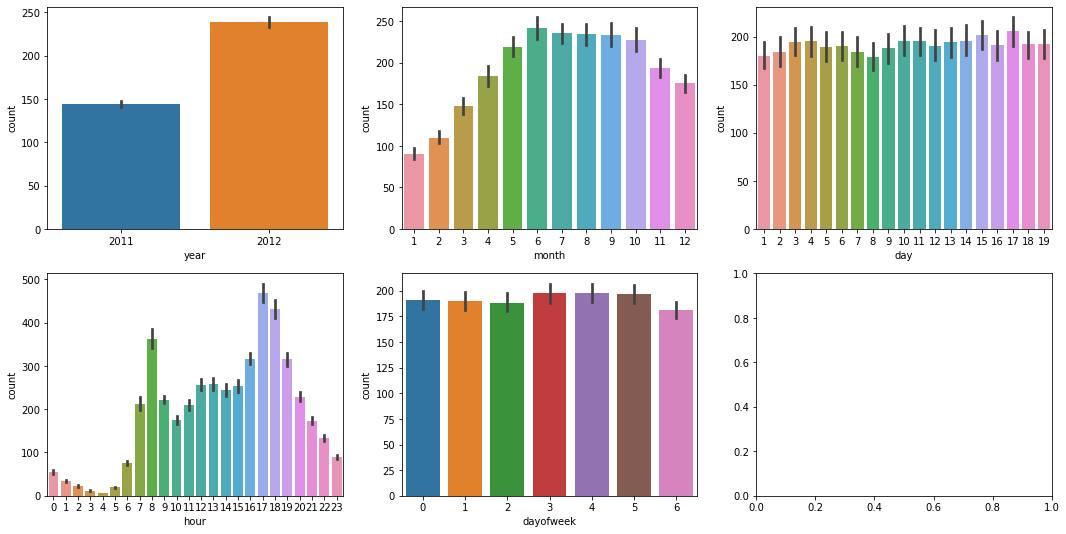

In [49]:
figure, ((ax1, ax2 ,ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,9)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='dayofweek', y='count', ax=ax5)

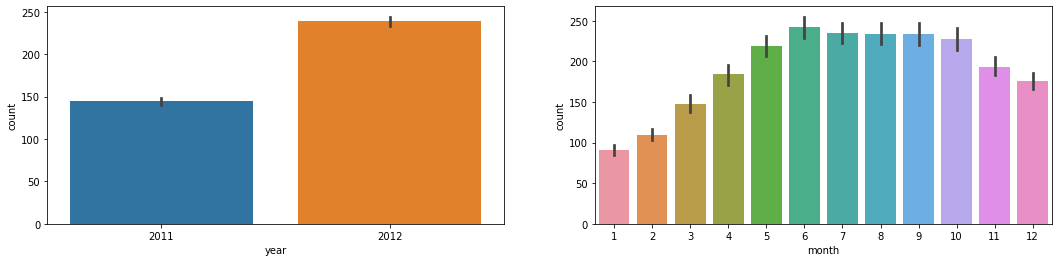

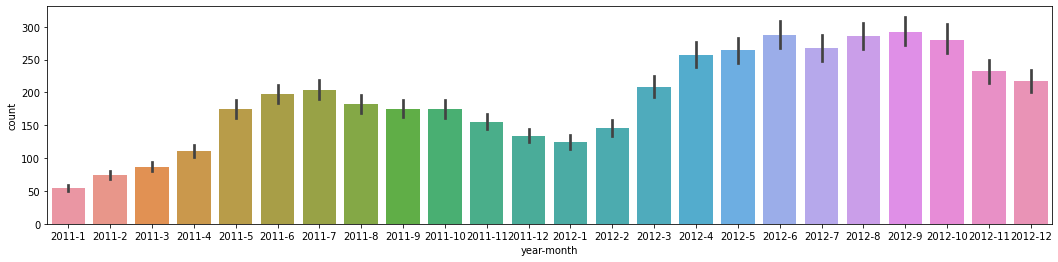

In [50]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.barplot(data=train, x='year-month', y='count', ax=ax3)

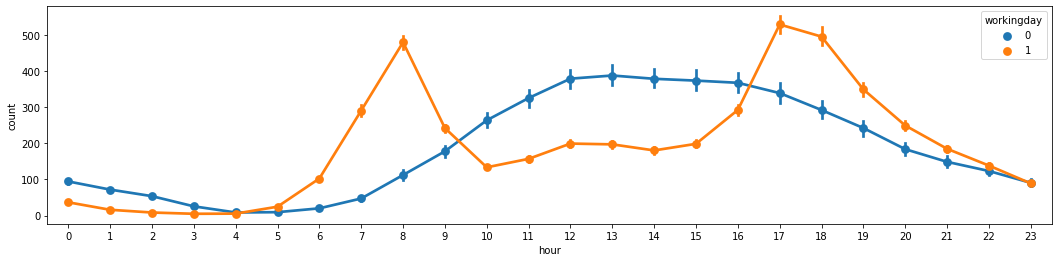

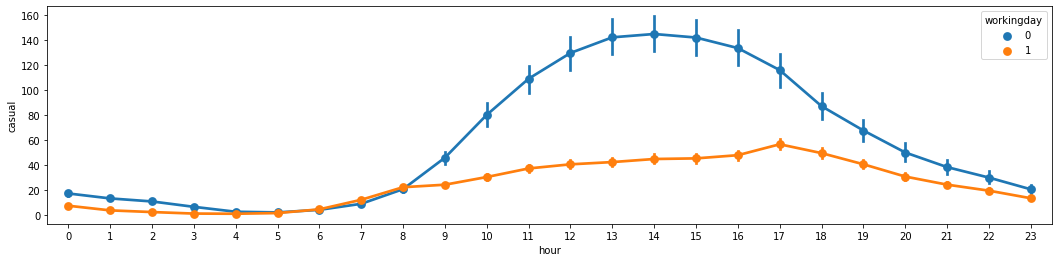

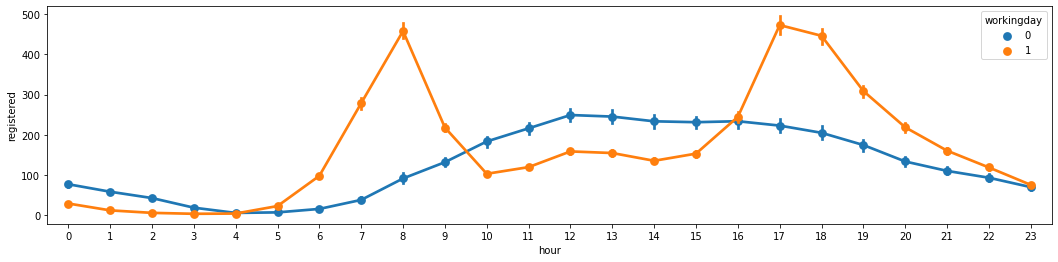

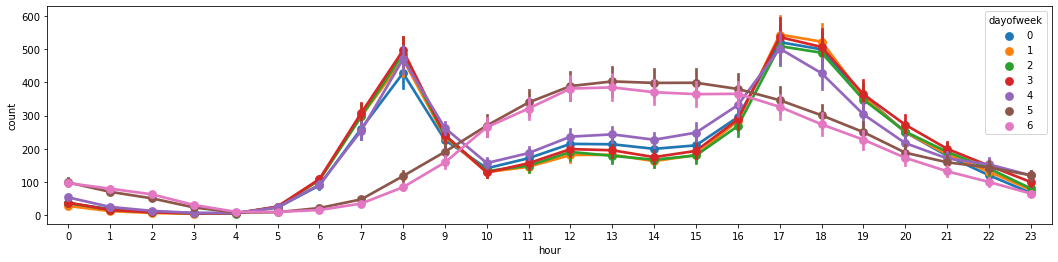

In [51]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='hour', y='casual', hue='workingday', ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='hour', y='registered', hue='workingday', ax=ax3)

figure, ax4 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax4)

# 5. Train

In [52]:
total_feature_names = train.columns.values
total_feature_names

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'year-month', '2011-1', '2011-2', '2011-3', '2011-4', '2011-5',
       '2011-6', '2011-7', '2011-8', '2011-9', '2011-10', '2011-11',
       '2011-12', '2012-1', '2012-2', '2012-3', '2012-4', '2012-5',
       '2012-6', '2012-7', '2012-8', '2012-9', '2012-10', '2012-11',
       '2012-12', 'clear', 'mist', 'lightheavy', 'heavy', 'Spring',
       'Summer', 'Autumn', 'Winter'], dtype=object)

In [64]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'day', 'hour', 'minute', 'second', 'dayofweek',
       'clear', 'mist', 'lightheavy', 'heavy', 'Spring',
       'Summer', 'Autumn', 'Winter']

In [65]:
x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(10886, 21)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,...,second,dayofweek,clear,mist,lightheavy,heavy,Spring,Summer,Autumn,Winter
0,1,0,0,1,9.84,14.395,81,0.0,1,0,...,0,5,True,False,False,False,True,False,False,False
1,1,0,0,1,9.02,13.635,80,0.0,1,1,...,0,5,True,False,False,False,True,False,False,False
2,1,0,0,1,9.02,13.635,80,0.0,1,2,...,0,5,True,False,False,False,True,False,False,False
3,1,0,0,1,9.84,14.395,75,0.0,1,3,...,0,5,True,False,False,False,True,False,False,False
4,1,0,0,1,9.84,14.395,75,0.0,1,4,...,0,5,True,False,False,False,True,False,False,False


In [66]:
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(6493, 21)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,...,second,dayofweek,clear,mist,lightheavy,heavy,Spring,Summer,Autumn,Winter
0,1,0,1,1,10.66,11.365,56,26.0027,20,0,...,0,3,True,False,False,False,True,False,False,False
1,1,0,1,1,10.66,13.635,56,0.0000,20,1,...,0,3,True,False,False,False,True,False,False,False
2,1,0,1,1,10.66,13.635,56,0.0000,20,2,...,0,3,True,False,False,False,True,False,False,False
3,1,0,1,1,10.66,12.880,56,11.0014,20,3,...,0,3,True,False,False,False,True,False,False,False
4,1,0,1,1,10.66,12.880,56,11.0014,20,4,...,0,3,True,False,False,False,True,False,False,False


In [67]:
y_train = train['count']
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

# Model object

In [104]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=10,
                      max_features=0.8,
                      n_estimators=50,
                      random_state=42)

model

RandomForestRegressor(max_depth=10, max_features=0.8, n_estimators=50,
                      random_state=42)

In [105]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.8, n_estimators=50,
                      random_state=42)

In [106]:
prediction = model.predict(x_test)
print(prediction.shape)

(6493,)


# Feature Importance

In [95]:
importances = model.feature_importances_
importances

array([2.06897333e-02, 2.54417407e-03, 3.99593948e-02, 7.73015604e-03,
       8.28706661e-02, 6.16980491e-02, 4.26056998e-02, 8.01381361e-03,
       8.42985110e-03, 6.53059271e-01, 0.00000000e+00, 0.00000000e+00,
       4.59019485e-02, 1.24070276e-03, 7.04723307e-04, 8.10050677e-03,
       0.00000000e+00, 1.24483979e-02, 7.29875738e-04, 6.23335105e-04,
       2.64970065e-03])

In [96]:
indices = np.argsort(importances)[::-1]
importance_names = [feature_names[i] for i in indices]
importance_names

['hour',
 'temp',
 'atemp',
 'dayofweek',
 'humidity',
 'workingday',
 'season',
 'Spring',
 'day',
 'lightheavy',
 'windspeed',
 'weather',
 'Winter',
 'holiday',
 'clear',
 'Summer',
 'mist',
 'Autumn',
 'second',
 'heavy',
 'minute']

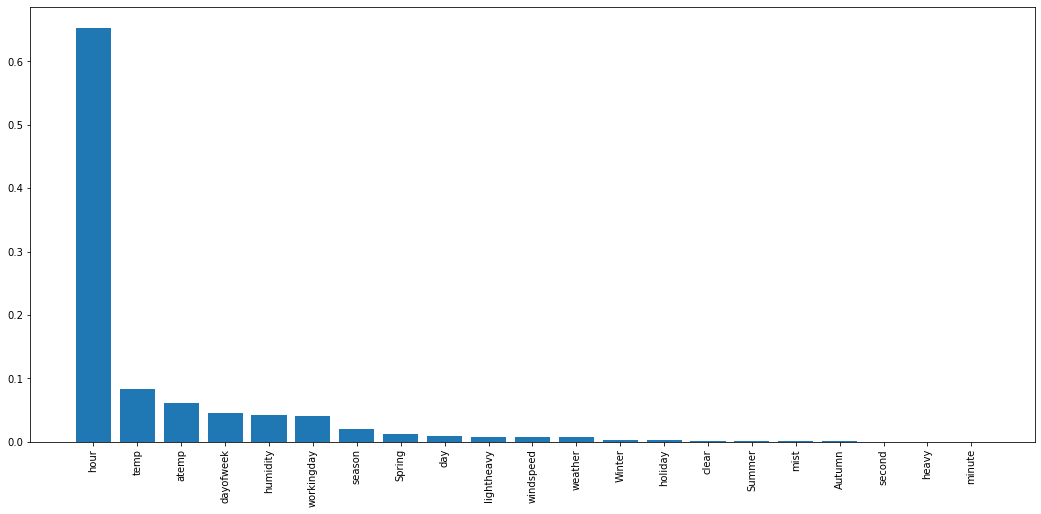

In [97]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(importance_names)), importances[indices])
plt.xticks(range(len(importance_names)),importance_names, rotation=90)
plt.show()

# Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print('Score = {0: 5f}'.format(score))

/Users/seeyonglee/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Score = -85.048631


Evaluation Metric = **Root Mean Squared Logarithmic Error**(RMSLE)
$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i+1)-\log(a_i+1))^2  } $$

In [89]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    sq_difference = np.square(difference)
    
    mean_diff = sq_difference.mean()
    score = np.sqrt(mean_diff)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [98]:
score = cross_val_score(model, x_train, y_train, cv=5, scoring=rmsle_scorer).mean()
print('Score = {0: 5f}'.format(score))

Score =  113.488770


# Hyperparameter Tuning

In [102]:
from tqdm import tqdm
num_epoch = 100

for epoch in tqdm(range(num_epoch)):
    max_depth = np.random.randint(20, 100)
    max_features = np.random.uniform(0.6, 1.0)
    
    model = RandomForestRegressor(random_state=42,
                                 max_depth=max_depth,
                                 max_features=max_features,
                                 n_estimators = 10)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring=rmsle_scorer).mean()
    
    print(f"max_depth= {max_depth}, max_features = {max_features: .6f}, Score = {score: .5f}")
    
    
    

  1%|          | 1/100 [00:01<02:30,  1.52s/it]

max_depth= 76, max_features =  0.651543, Score =  114.88802


  2%|▏         | 2/100 [00:03<02:38,  1.61s/it]

max_depth= 87, max_features =  0.688019, Score =  114.89772


  3%|▎         | 3/100 [00:05<02:53,  1.78s/it]

max_depth= 65, max_features =  0.616536, Score =  115.07728


  4%|▍         | 4/100 [00:06<02:40,  1.67s/it]

max_depth= 68, max_features =  0.610677, Score =  115.07728


  5%|▌         | 5/100 [00:08<02:34,  1.62s/it]

max_depth= 75, max_features =  0.837338, Score =  115.52977


  6%|▌         | 6/100 [00:09<02:28,  1.58s/it]

max_depth= 92, max_features =  0.726119, Score =  114.66577


  7%|▋         | 7/100 [00:11<02:14,  1.45s/it]

max_depth= 64, max_features =  0.605070, Score =  115.07728


  8%|▊         | 8/100 [00:12<02:14,  1.46s/it]

max_depth= 82, max_features =  0.757373, Score =  114.66577


  9%|▉         | 9/100 [00:14<02:18,  1.52s/it]

max_depth= 62, max_features =  0.885186, Score =  114.45689


 10%|█         | 10/100 [00:15<02:21,  1.57s/it]

max_depth= 68, max_features =  0.981586, Score =  114.55130


 11%|█         | 11/100 [00:17<02:09,  1.45s/it]

max_depth= 25, max_features =  0.664358, Score =  114.36728


 12%|█▏        | 12/100 [00:18<02:04,  1.41s/it]

max_depth= 50, max_features =  0.745720, Score =  114.66577


 13%|█▎        | 13/100 [00:19<02:06,  1.45s/it]

max_depth= 77, max_features =  0.869951, Score =  114.45689


 14%|█▍        | 14/100 [00:21<02:09,  1.51s/it]

max_depth= 53, max_features =  0.839432, Score =  115.52977


 15%|█▌        | 15/100 [00:23<02:10,  1.53s/it]

max_depth= 22, max_features =  0.876198, Score =  114.70213


 16%|█▌        | 16/100 [00:25<02:38,  1.88s/it]

max_depth= 37, max_features =  0.941041, Score =  114.25024


 17%|█▋        | 17/100 [00:27<02:33,  1.85s/it]

max_depth= 85, max_features =  0.779549, Score =  114.50558


 18%|█▊        | 18/100 [00:29<02:28,  1.81s/it]

max_depth= 92, max_features =  0.993770, Score =  114.55130


 19%|█▉        | 19/100 [00:30<02:19,  1.73s/it]

max_depth= 43, max_features =  0.833230, Score =  115.52977


 20%|██        | 20/100 [00:32<02:16,  1.71s/it]

max_depth= 98, max_features =  0.767885, Score =  114.50558


 21%|██        | 21/100 [00:34<02:27,  1.86s/it]

max_depth= 58, max_features =  0.729441, Score =  114.66577


 22%|██▏       | 22/100 [00:36<02:32,  1.96s/it]

max_depth= 59, max_features =  0.818101, Score =  115.52977


 23%|██▎       | 23/100 [00:38<02:16,  1.77s/it]

max_depth= 92, max_features =  0.644652, Score =  114.88802


 24%|██▍       | 24/100 [00:40<02:18,  1.82s/it]

max_depth= 64, max_features =  0.919716, Score =  114.25024


 25%|██▌       | 25/100 [00:41<02:08,  1.71s/it]

max_depth= 77, max_features =  0.771833, Score =  114.50558


 26%|██▌       | 26/100 [00:43<02:05,  1.69s/it]

max_depth= 49, max_features =  0.924207, Score =  114.25024


 27%|██▋       | 27/100 [00:45<02:09,  1.77s/it]

max_depth= 90, max_features =  0.968460, Score =  114.55130


 28%|██▊       | 28/100 [00:46<02:01,  1.68s/it]

max_depth= 71, max_features =  0.736723, Score =  114.66577


 29%|██▉       | 29/100 [00:48<02:03,  1.74s/it]

max_depth= 79, max_features =  0.952434, Score =  114.55130


 29%|██▉       | 29/100 [00:49<02:02,  1.72s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/seeyonglee/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-102-4d2c5d0254d4>", line 12, in <module>
    score = cross_val_score(model, x_train, y_train, cv=5, scoring=rmsle_scorer).mean()
  File "/Users/seeyonglee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/seeyonglee/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 401, in cross_val_score
    cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
  File "/Users/seeyonglee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/seeyonglee/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 242, in cross_validat

TypeError: object of type 'NoneType' has no len()

# Submit

In [111]:
submit = pd.read_csv('../Bike_Sharing_Demand/DataSet/sampleSubmission.csv')
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [112]:
submit['count'] = prediction
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,14.851845
1,2011-01-20 01:00:00,5.522996
2,2011-01-20 02:00:00,4.574071
3,2011-01-20 03:00:00,2.768621
4,2011-01-20 04:00:00,2.692588


In [117]:
# submit['count'].apply(lambda x: round(x))

In [ ]:
submit.to_csv('mySubmit.csv', index=False)